In [205]:
import numpy as np
import matplotlib.pyplot as plt
import functools
import torch
from densities import uniform_rect_regions as pdf

In [206]:
densties = ['custom']
regions = [
        torch.tensor([[.0, .3]]),
        torch.tensor([[.6, .9]])
        ]
weights = [.5, .5]

In [207]:
def custom_pdf(x):
    """
     Define a custom probability density function (PDF).
    """
    #x = x.item()
    return np.where(((x > 0) & (x < 1)), 1, 0)
    return np.where(((x > 0) & (x < 0.3)) | ((x > 0.6) & (x < 0.9)), 5 / 3, 0)

0.15000000000000002 amp
0.75 vert
0.15 amp
0.15 vert
Generated Tensor:
torch.Size([2000, 1, 1, 1])


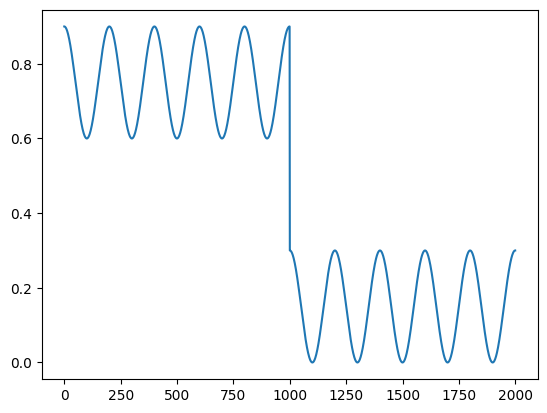

In [208]:
# Function to generate the desired cosine wave for a given range and frequency
def generate_cosine_wave(start, end, length, frequency):
    # Create a linspace for the x values (0 to 2*pi for one cycle of the cosine wave)
    x = torch.linspace(0, 1, length)
    
    # Amplitude is half the range (difference between start and end divided by 2)
    amplitude = (end - start) / 2
    
    # Vertical shift is the midpoint between start and end
    vertical_shift = (start + end) / 2
    print(amplitude,"amp")
    print(vertical_shift, "vert")
    
    # Create the cosine wave
    cosine_wave = amplitude * torch.cos(frequency * x) + vertical_shift
    
    return cosine_wave

# Parameters
frequency =  10 * np.pi  # Frequency of the cosine wave (adjust as needed)
length = 1000  # Length of each section (50 elements)
start_1, end_1 = 0.6, 0.9  # Range for the first part
start_2, end_2 = 0.0, 0.3  # Range for the second part

# Generate the two parts of the cosine wave
cos_wave_1 = generate_cosine_wave(start_1, end_1, length, frequency)
cos_wave_2 = generate_cosine_wave(start_2, end_2, length, frequency)

# Concatenate both parts to form the final tensor
final_tensor = torch.cat([cos_wave_1, cos_wave_2])
# Print the result
print("Generated Tensor:")
print(final_tensor.view(-1,1,1,1).shape)
plt.plot(final_tensor)
plt.show()
out = final_tensor.view(-1,1,1,1)


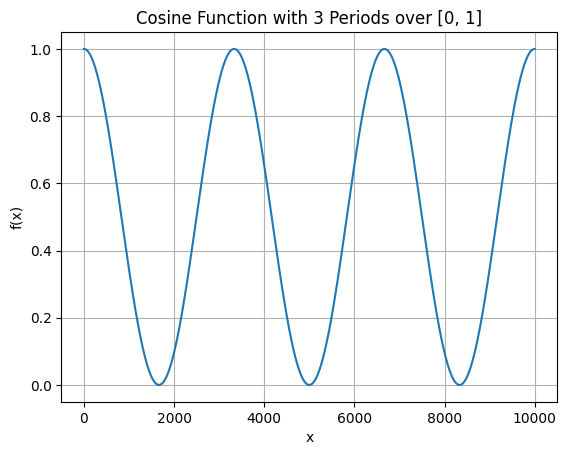

In [209]:
def cosine_function(t, N, x):
    """
    Generate a cosine function that oscillates between 0 and 1,
    with N periods over the interval [0, t].

    Parameters:
    - t: the endpoint of the interval.
    - N: number of periods.
    - x: the input values (can be a numpy array).

    Returns:
    - Function values for the input x.
    """
    return (1 + np.cos(2 * np.pi * N * x / t)) / 2

t = 1  # Interval [0, t] 1 second
N = 3   # Number of periods
x = np.linspace(0, t, 10000)  # x values in the interval [0, t]

# Compute the function values
y = cosine_function(t, N, x)

# Plot the function
plt.plot(y)
plt.title(f"Cosine Function with {N} Periods over [0, {t}]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

0.15000000000000002 amp
0.75 vert
0.15 amp
0.15 vert


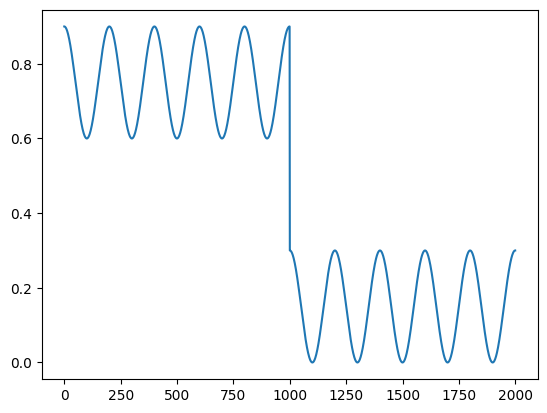

In [210]:
def generate_cosine_wave(start, end, length, frequency):
    # Create a linspace for the x values (0 to 2*pi for one cycle of the cosine wave)
    x = torch.linspace(0, 1, length)
    
    # Amplitude is half the range (difference between start and end divided by 2)
    amplitude = (end - start) / 2
    
    # Vertical shift is the midpoint between start and end
    vertical_shift = (start + end) / 2
    print(amplitude,"amp")
    print(vertical_shift, "vert")
    
    # Create the cosine wave
    cosine_wave = amplitude * torch.cos(frequency * x) + vertical_shift
    
    return cosine_wave

# Parameters
frequency =  10 * np.pi  # Frequency of the cosine wave (adjust as needed)
length = 1000  # Length of each section (50 elements)
start_1, end_1 = 0.6, 0.9  # Range for the first part
start_2, end_2 = 0.0, 0.3  # Range for the second part

# Generate the two parts of the cosine wave
cos_wave_1 = generate_cosine_wave(start_1, end_1, length, frequency)
cos_wave_2 = generate_cosine_wave(start_2, end_2, length, frequency)

# Concatenate both parts to form the final tensor
cosine = np.hstack([cos_wave_1,cos_wave_2])
plt.plot(cosine)
plt.show()


In [211]:
out = torch.tensor(cosine, requires_grad=True).unsqueeze(1).unsqueeze(1).unsqueeze(1) ### previously predicted values
out = out.repeat(1, 4, 1, 1)

In [212]:
import Ergodic_Loss
import sys
k_max = 12
sys.path.append(r'C:\Users\JP\Documents\TU Berlin\Master\Code_RNN\Recursive_kan\Ergodic_Loss.py') 
import importlib
importlib.reload(Ergodic_Loss)
criterion = Ergodic_Loss.Ergodicity_Loss(N_Agents = 1, n_timesteps = 1000,L = None, in_dim = 1, k_max = k_max,control_energy_reg = 0, density = 'custom', pdf = custom_pdf, max_pdf = 5 / 3, num_samples = 1000)
criterion.verbose = True
criterion(x = out, u = None)

tensor([ 1.0000, -0.0260,  0.0209, -0.0394,  0.0024, -0.0100, -0.0442,  0.0106,
        -0.0454, -0.0743, -0.0301,  0.0114]) target distribution
torch.Size([4, 12])
model tensor([[ 1.0000,  0.0817,  0.2164,  0.3199, -0.4675, -0.0150, -0.0846,  0.0180,
          0.0145,  0.1388, -0.0719, -0.1476],
        [ 1.0000,  0.0791,  0.2580,  0.3604, -0.4344,  0.0067, -0.0920,  0.0394,
         -0.0444,  0.1110, -0.0213, -0.1386],
        [ 1.0000,  0.0694,  0.2947,  0.3636, -0.4034,  0.0304, -0.1666,  0.0455,
         -0.0990,  0.0697, -0.0244, -0.1590],
        [ 1.0000,  0.0755,  0.2874,  0.3716, -0.4185,  0.0323, -0.0985,  0.0095,
         -0.0222,  0.1301, -0.0457, -0.1273]], grad_fn=<CopySlices>) target tensor([ 1.0000, -0.0260,  0.0209, -0.0394,  0.0024, -0.0100, -0.0442,  0.0106,
        -0.0454, -0.0743, -0.0301,  0.0114])
scaling tensor([1.0000e+00, 9.2000e-02, 2.4705e-02, 1.1133e-02, 6.2927e-03, 4.0365e-03,
        2.8066e-03, 2.0635e-03, 1.5806e-03, 1.2493e-03, 1.0122e-03, 8.3666e-04

tensor(0.1392, grad_fn=<SmoothL1LossBackward0>)

In [213]:
import math
k = 4
h_k = math.sqrt(0.5)
kp = (math.pi * k)
(1 / h_k) * (1 / kp) * (5 / 3)  * (math.sin(0.9 * kp) - math.sin(0.6 * kp) + math.sin(0.3 * kp)) 

-0.46702001071907523